# Principal Component Analysis using Python

## Things to be covered :

1. What is Principal Component Analysis?
2. When to use PCA?
3. How to conduct the PCA Analysis?
4. Conclucion of the Analysis?

## What is PCA?

Principal Component Analysis (PCA) is an unsupervised statistical technique algorithm. PCA is a “dimensionality reduction” method. It reduces the number of variables that are correlated to each other into fewer independent variables without losing the essence of these variables. It provides an overview of linear relationships between inputs and variables.


### Objectives

- PCA helps in Dimensionality reduction. Converts set of correlated variables to non-correlated variables.
- It finds a sequence of linear combinations of variables.
- PCA also serves as a tool for better data visualization of high dimensional data. We can create a heat map to show the correlation between each component. 
- It is often used to help in dealing with multi- collinearity before a model is developed.
- It describes that data is a good story teller of its own.
- These models are useful in data interpretation and variable selection.


### Assumptions of PCA
- Independent variables are highly correlated to each other.
- Variables included are metric level or nominal level.
- Features are low dimensional in nature.
- Independent variables are numeric in nature.
- Bartlett-Test: The Bartlett test is statistically significant as.
    H0: Variables are uncorrelated.
    H1: Variables are correlated.

## When to use PCA?
- Whenever we want to ensure that variables in data are independent to each other.
- When we want to reduce the number of variables in a data set with many variables in it.
- When we want to interpret data and variable selection out of it.


## How does PCA Algorithm work?

Suppose we have 2 variables X1 and X2. Data is spread across the area where regression determines a line of best fit.

principal component analysis 
The origin will shift to the point where variation in X1 and X2 are maximum, so PC1 is a new component and another will be perpendicular to it but in multidimensional space as PC2. So that PC1 and PC2 are not correlated to each other.

Now, the objective is to find such directions in data where PC1 and PC2 can be made perpendicular to each other. This is what PCA does. This process will repeat in the form of Matrix multiplication if the dataset has many variables. It is an NxM matrix.

Now PCA will take linear combination as:

    PC1=a1X1+a2X2

    PC2=b1X1+b2X2

For example, if I want to study the variables affecting winning candidates in the election commission during past elections in India. Variables like candidate education, age, criminal cases, assets, liabilities, religion, area population, Institutes, Police Stations, and so on. There must be a lot of correlation among the variables. Based on the principle of correlation, I collapse them into underlying dimensions.  So the analysis will obtain the first factor which has the highest variance reduction, then, the second factor with the next highest reduction and third highest and so on.

In [ ]:
pip install factor-analyzer

In [2]:
#import all the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns 
from factor_analyzer import FactorAnalyzer

from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer= load_breast_cancer()

In [6]:
cancer.keys() #columns in the data set

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Explanation of the data

1. The data has 569 observations and 30 numeric fields or columns - (30 dimensions)
2. There is a class or Target i.e. Malignant(1) and Benign (0)
3. There are no missing values in the data


In [8]:
df=pd.DataFrame(cancer['data'],columns= cancer['feature_names'])


In [7]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
Y= cancer['target']

In [10]:
Y.shape

(569,)

In [11]:
Y= pd.DataFrame(Y, columns=['target'])

In [13]:
status = {0:'Malignant', 1:'Benign'} 
Y['target'] = Y['target'].astype(int).map(status)
print(Y)

        target
0    Malignant
1    Malignant
2    Malignant
3    Malignant
4    Malignant
..         ...
564  Malignant
565  Malignant
566  Malignant
567  Malignant
568     Benign

[569 rows x 1 columns]


In [14]:
Y['target'].value_counts()

Benign       357
Malignant    212
Name: target, dtype: int64

In [13]:
df.shape

(569, 30)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Adequacy Test
Before you perform PCA analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

##### Bartlett’s Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.



In [16]:

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(39391.52278362941, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix and that a PCA can perform a compression of the available information only if we reject the null hypothesis.


##### Kaiser-Meyer-Olkin Test
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [17]:

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8317335254096532

The overall KMO for our data is 0.831, which is excellent. This value indicates that you can proceed with your planned factor analysis. The KMO index compares the values of correlations between variables and those of the partial correlations. If the KMO index is high (~ 1), the PCA can act efficiently; if KMO
is low (~ 0), the PCA is not relevant.

### Step 1

Read the data file in tool and __Standardize__ the data set for missing values computation, outlier analysis is done properly, data is numeric in nature etc.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
## setting all values with a mean of 0 and standard deviation of 1

scaler = StandardScaler()

scaled_df=df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Step 2 
Finding out what is the kind of correlation that exists among each one of the variables?
Construct __Covariance matrix__ of data.

- How Co-dependent two variables are
- Negative Covariance : Indirectly proportional
- Positive Covariance : Directly Proportional



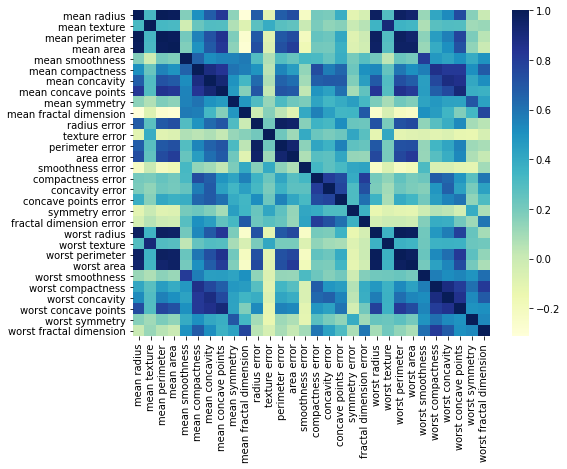

In [20]:
plt.figure(figsize=(8,6))
#covMatrix = np.cov(x_std,bias=True)
#print (covMatrix)
covMatrix = pd.DataFrame.cov(scaled_df)
sns.heatmap(covMatrix, annot=False, cmap="YlGnBu")
plt.show()

- Mean radius is positively correlated with mean perimeter, mean area and Worst perimeter, worst area
- Mean radius is negatively corelated with mean fractal dimension, smoothness error, 
- Smoothness, compactness, concavity, Concave points  which are worst are indirectly propotional to texture error where as they are slightly directly proportional to worst perimeter, worst areas and the mean compactness, mean concavity

### Step 3

Perform a PCA analysis 

Correlation Matrix decomposition of PCA will result in __Eigenvalues & Eigenvectors__.

#### Eigenvectors
Eigenvectors are a list of coefficients which shows how much each input variable contributes to each new derived variable. If we square and add each Eigenvector then we get Eigenvalue.

#### Eigenvalues
Represents the proportion of variance explained by each PC. Also represents the largest variance reduction. Sum of all Eigenvalues equals the sum of the variances of all input variables as variance summarization.

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=6)
Principal_components=pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
print(pca_df)

          PC 1       PC 2      PC 3      PC 4      PC 5      PC 6
0     9.192837   1.948583 -1.123167  3.633727 -1.195109  1.411421
1     2.387802  -3.768172 -0.529293  1.118265  0.621774  0.028657
2     5.733896  -1.075174 -0.551748  0.912081 -0.177085  0.541452
3     7.122953  10.275589 -3.232790  0.152546 -2.960878  3.053423
4     3.935302  -1.948072  1.389767  2.940641  0.546747 -1.226493
..         ...        ...       ...       ...       ...       ...
564   6.439315  -3.576817  2.459486  1.177313 -0.074824 -2.375193
565   3.793382  -3.584048  2.088476 -2.506029 -0.510722 -0.246710
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936
568  -5.475243  -0.670637  1.490443 -2.299158 -0.184703  1.617836

[569 rows x 6 columns]


In [23]:
for_visual = pd.concat([pca_df, Y['target']], axis = 1)
print(for_visual)

          PC 1       PC 2      PC 3      PC 4      PC 5      PC 6     target
0     9.192837   1.948583 -1.123167  3.633727 -1.195109  1.411421  Malignant
1     2.387802  -3.768172 -0.529293  1.118265  0.621774  0.028657  Malignant
2     5.733896  -1.075174 -0.551748  0.912081 -0.177085  0.541452  Malignant
3     7.122953  10.275589 -3.232790  0.152546 -2.960878  3.053423  Malignant
4     3.935302  -1.948072  1.389767  2.940641  0.546747 -1.226493  Malignant
..         ...        ...       ...       ...       ...       ...        ...
564   6.439315  -3.576817  2.459486  1.177313 -0.074824 -2.375193  Malignant
565   3.793382  -3.584048  2.088476 -2.506029 -0.510722 -0.246710  Malignant
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447  Malignant
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  Malignant
568  -5.475243  -0.670637  1.490443 -2.299158 -0.184703  1.617836     Benign

[569 rows x 7 columns]


### Step 4

Compute the Principal Components


#### Scree Plot

A visual approach to selecting the number of principal components to keep is the use of a scree plot. A scree plot shows the number of components on the X-axis against the proportion of the variance explained on the Y-axis. The suggested number of components to keep is where the plot forms __an elbow and the curve flattens__ out. 

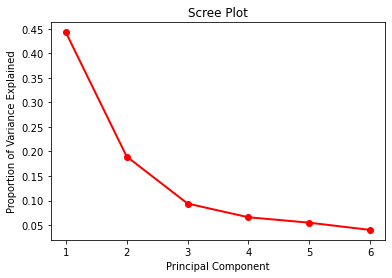

In [24]:
#import numpy as np
#import matplotlib
#import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

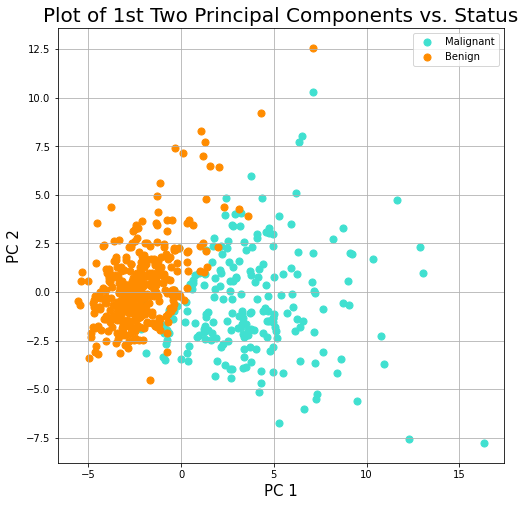

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs. Status', fontsize = 20)
W_GROUP = ['Malignant','Benign']
colors = ['turquoise', 'darkorange']
for target, color in zip(W_GROUP,colors):
    indicesToKeep = for_visual['target'] == target
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(W_GROUP)
ax.grid()

In [25]:
explained_variance= pca.explained_variance_ratio_
explained_variance

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522])

In [28]:
explained_variance= np.insert(explained_variance,0,0)

In [29]:
cumulative_variance= np.cumsum(np.round(explained_variance,decimals=3))

In [30]:
# combining the Data Frame

pc_df= pd.DataFrame(['','PC1','PC2','PC3','PC4','PC5','PC6'],columns=['PC'])
explained_variance_df= pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df=pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [31]:
df_explained_variance= pd.concat([pc_df,explained_variance_df,cumulative_variance_df],axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.442720,0.443
2,PC2,0.189712,0.633
3,PC3,0.093932,0.727
4,PC4,0.066021,0.793
5,PC5,0.054958,0.848
6,PC6,0.040245,0.888


### Step 5

Reduce the dimensions and Interpret the new Dimensions or Factors

In [32]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)


Proportion of Variance Explained :  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]
Cumulative Prop. Variance Explained:  [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796]


In [33]:
print(pca.explained_variance_) #eigenvalues


[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224]


Finally, we could consider to hold onto principal components whose eigenvalues are greater than one.  The eigenvalues are sum of squares of the distance between the projected data points and the origin along an eigenvector associated with a principal component.  These are stored in the _explained_variance_ attribute. Interestingly, the all six eigenvalues are above one.

In [35]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=scaled_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
mean radius,0.218902,-0.233857,-0.008531,0.041409,0.037786,0.018741
mean texture,0.103725,-0.059706,0.064550,-0.603050,-0.049469,-0.032179
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,0.037375,0.017308
mean area,0.220995,-0.231077,0.028700,0.053434,0.010331,-0.001888
mean smoothness,0.142590,0.186113,-0.104292,0.159383,-0.365089,-0.286374
mean compactness,0.239285,0.151892,-0.074092,0.031795,0.011704,-0.014131
mean concavity,0.258400,0.060165,0.002734,0.019123,0.086375,-0.009344
mean concave points,0.260854,-0.034768,-0.025564,0.065336,-0.043861,-0.052050
mean symmetry,0.138167,0.190349,-0.040240,0.067125,-0.305941,0.356458
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587,-0.044424,-0.119431



#### Interpretation of the Loadings:
As a final point, we need to interpret our final PCA solution.  
- The first principal component PC1 has strong loadings from Mean Concavity (0.2584), Mean Compactness(0.2392), Mean Concave points(0.2608). 
- The second principal component PC2 has strong loadings on fractal dimension - mean, worst, error.
- The third principal component PC3 has strong loadings on symmetry, smoothness and texture.

Overall, in this way, the components can be combined to make smaller dimensions.
